# Scope: introducing *subgroup discovery* (SGD)

This tutorial introduces, by means of two applications in materials science, the artificial-intelligence technique subgroup discovery (SGD). SGD identifies rules describing (sub)groups of data points with outstanding properties, compared to a given population. 

In this tutorial, SGD is applied as a showcase to identify rules describing subgroups that 

1. are associated with a specific value of a target quantity, and
2. deviate the most from an established model.

We apply these two approaches in the context of heterogeneous catalysis to identify promising transition-metal alloys for the oxygen-reduction and -evolution reactions, i.e., two key chemical transformations for energy conversion. 

# Identifying rules describing outstanding catalysts via subgroup discovery


Heterogeneous catalysts enable the efficient transformation of reactants into the desired products. These materials are typically solids and they convert molecules by providing a surface with the appropriate reactivity, in terms of the energetics of surface reactions, which break and form bonds of reactants, reaction intermediates or products. The strength at which reactants, intermediates and products bind to the catalyst surface, indicated by their adsorption energies, is used to estimate the reactivity of a given material. Adsorption energies are conveniently evaluated using atomistic catalyst surface models via first-principles calculations (e.g., density-functional-theory, DFT). These adsorption energies are commonly used to search for new materials. However, the direct application of DFT to accurately evaluate adsorption energies is extremely time- and resource-consuming, since  the number of possible materials is immense and many of them have complex surface structures, on which a large number of sites are available and might play a role in catalysis.

In order to efficiently explore a large number of materials in the quest for novel catalysts, physical and data-centric models have been used for the estimation of adsorption energies at lower computational effort compared to DFT. Nevertheless, only very few of the investigated materials and surface sites present the appropriate adsorption properties to be useful for a given catalytic process. Thus, these statistically exceptional situations might be overlooked by global models designed to describe as many materials and surfaces as possible. Here, the SGD artificial-intelligence approach is used to identify key descriptive parameters particularly associated to outstanding adsorption properties of transition-metal surfaces. Crucially, constraints on the values of these key parameters emerge from the SGD analysis, which can be exploited to quickly screen for promising alloy catalysts, significantly more complex than the monometallic materials.  

# SGD approach



The SGD approach is based on a data set containing a target quantity of interest and many *candidate* descriptive parameters, whose values are known for all the samples in the data set. In the context of materials-science, the target quantity might be a materials' property or function and the *candidate* descriptive parameters may characterize the materials as well as the underlying processes that are potentially relevant for the materials' property or function. The descriptive parameters are denoted as *candidate* because SGD, as it will be clear below, selects among them. Crucially, unimportant candidate descriptive parameters will be ignored by SGD.

From this data set, SGD generates of a pool of propositions, statements about the candidate descriptive parameters that apply only to a portion of the data set. For the case of continuous parameters, the propositions are inequalities describing constraints on the values of these descriptive parameters. Then, SGD identifies selectors, here in the form of *conjunctions*, i.e., statements formed by a number of propositions combined via the “AND” connector (denoted “∧”), which define (or describe) the selection of subgroups of data points associated with the most outstanding distributions of the target values. The *quality function* $Q(SG,P)$ measures how outstanding a SG is. This function has the form 

\begin{equation}
 Q(SG,P) = \frac{s(SG)}{s(P)}* u(SG,P),
\end{equation} 

where the *coverage* $s(SG)/s(P)$ contains the ratio between the number of data points in the subgroup, $s(SG)$, and the total number of data points in the whole data set, $s(P)$. The whole data set is referred to as the *population* $P$. The coverage controls the subgroup size and prevents that very small SGs with little statistical significance are selected. The second term, $u(SG,P)$, is called *utility function* and it encodes the measure of *dissimilarity* between the SG and the whole data set. The utility function is chosen according to the scientific question of interest, as discussed later in this tutorial. 

The propositions entering the selectors resulting in the highest $Q(SG,P)$ values, and thus in the most outstanding SGs, can be seen as rules describing the exceptional SG behavior and reflecting the relevant underlying processes. The parameters entering these proppositions are, in turn, the key, most relevant, parameters associated with the outstanding SG performance, out of all the initially offered ones. Because the SG search is performed by maximizing a function that measures how outstanding specific subselections of data points are, this approach identifies a local behavior.

The SGD approach and its application to materials science are presented with further details in:

<div style="padding: 1ex; margin-top: 1ex; margin-bottom: 1ex; border-style: dotted; border-width: 1pt; border-color: blue; border-radius: 3px;"> B. R. Goldsmith, M. Boley, J. Vreeken, M. Scheffler, L. M. Ghiringhelli: <span style="font-style: italic;">Uncovering structure-property relationships of materials by subgroup discovery.</span>, New J. Physics 19, 013031 (2017) <a href="https://doi.org/10.1088/1367-2630/aa57c2" target="_blank">[PDF]</a> .
</div>

<div style="padding: 1ex; margin-top: 1ex; margin-bottom: 1ex; border-style: dotted; border-width: 1pt; border-color: blue; border-radius: 3px;"> M. Boley, B. R. Goldsmith,  L. M. Ghiringhelli, J. Vreeken: <span style="font-style: italic;">Identifying consistent statements about numerical data with dispersion-corrected subgroup discovery</span>, Data Min. Knowl. Discov. 31, 1391 (2017) <a href="https://doi.org/10.1007/s10618-017-0520-3" target="_blank">[PDF]</a> .
</div>

In this tutorial, we use the SGD algorithm as implemented in <span style="font-family: monospace;">realkd</span>, available at https://bitbucket.org/realKD/.

# Data set of adsorption energies and candidate descriptive parameters


We analyze a data set containing adsorption energies and candidate descriptive parameters derived from DFT calculations in:

<div style="padding: 1ex; margin-top: 1ex; margin-bottom: 1ex; border-style: dotted; border-width: 1pt; border-color: blue; border-radius: 3px;"> M. Andersen, S. V. Levchenko, M. Scheffler, K. Reuter: <span style="font-style: italic;">Beyond scaling relations for the description of catalytic materials.</span>, ACS Catal. 9, 2752 (2019) <a href="https://doi.org/10.1021/acscatal.8b04478" target="_blank">[PDF]</a> .
</div>

<div style="padding: 1ex; margin-top: 1ex; margin-bottom: 1ex; border-style: dotted; border-width: 1pt; border-color: blue; border-radius: 3px;"> M. Deimel, K. Reuter, M. Andersen: <span style="font-style: italic;">Active site representation in first-principles microkinetic models: data-enhanced computational screening for improved methanation catalysts.</span>, ACS Catal. 10, 13729 (2020) <a href="https://doi.org/10.1021/acscatal.0c04045" target="_blank">[PDF]</a> .
</div>


The data set contains 95 oxygen (atomic O) adsorption energy values, $E_{\mathrm{ads}}^{\mathrm{O}}$, corresponding to the binding strengths of oxygen on several surface sites of different surfaces. Eleven transition metals (Fe, Co, Ni, Cu, Ru, Rh, Pd, Ag, Ir, Pt, Au) and several surfaces (fcc(221), fcc(111), fcc(100), bcc(210), and hcp(0001)) are considered in our analysis. The adsorption energy is calculated as

\begin{equation}
 E_{\mathrm{ads}}^{\mathrm{O}} =E_{\mathrm{surf,clean}}+ 0.5 * E_{\mathrm{O}_{2(g)}} - E_{\mathrm{surf,ads}},
\end{equation} 

where $E_{\mathrm{O}_{2(g)}}$, $E_{\mathrm{surf,clean}}$ and $E_{\mathrm{surf,ads}}$ are  the total energies of the $\mathrm{O}_2$ gas-phase molecule, clean surface, and surface containing the O adsorbate, respectively.

16 candidate descriptive parameters are used:

Atomic:
<ul>
    <li>$PE$ - pauling electronegativity</li>
    <li>$IP$ - ionization potential</li>
    <li>$EA$ - electron affinity</li>
</ul>
Bulk:
<ul>
    <li>$bulk_{nnd}$ - bulk nearest-neighbor distance</li>
    <li>$r_d$ - $\it{d}$-orbital radius</li>
    <li>$V^2_{ad}$ - coupling matrix element between the adsorbate states and the metal $\it{d}$-states squared</li>
</ul>  
Surface:
<ul>
    <li>$W$ - surface work function</li>
</ul>
Surface-site:
<ul>
    <li>$site_{no}$ - number of atoms in the surface site</li>
    <li>$CN$ - coordination number</li>
    <li>$site_{nnd}$ - site nearest-neighbor distance</li>
    <li>$\epsilon_d$ - $\it{d}$-band center</li>
    <li>$W_d$ - $\it{d}$-band width</li>
    <li>$f_d$ - $\it{d}$-band filling</li>
    <li>$f_{sp}$ - $\it{sp}$-band filling</li>
    <li>$DOS_d$ - density of $\it{d}$-states at the Fermi level</li>
    <li>$DOS_{sp}$ - density of $\it{sp}$-states at the Fermi level</li>
</ul>

The atomic parameters are properties that don't depend on the atomic environment, but only on the element itself. The bulk, surface and site parameters are related to the geometry and the electronic structure of bulk metals, or their surfaces and adsorption sites. We note that the choice of candidate descriptive parameters includes properties previously proposed to correlate with adsorption energies such as the <a href="https://www.sciencedirect.com/science/article/pii/0039602896800070?via%3Dihub" target="_blank">$d$-band center</a> and the <a href="https://www.science.org/doi/10.1126/science.aab3501" target="_blank">coordination number of surface atoms</a>, as well as many other, potentially relevant ones.  

We start by importing the required modules and the data set.

In [67]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import json
import statistics
import re
import seaborn as sb
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from scipy.stats import norm, entropy

plt.rcParams.update({'font.size': 20})
pd.options.display.max_columns, pd.options.display.max_rows = None,None

#import data set
df=pd.read_csv('data/sgd-alloys-oxygen-reduction-evolution/oxygen_data.csv').set_index('Samples')
#display data set
df.head(n=10)
#label_metal enumerates the different metals and is used for plotting (see below)

,label_metal,E_ads_eV,bulk_nnd_Ang,site_nnd_Ang,r_d_Ang,V_ad_sq,CN,site_no,epsilon_d_eV,W_d_eV,W_eV,IP_eV,EA_eV,f_d,f_sp,PE,DOS_d_inv_eV,DOS_sp_inv_eV
Samples,,,,,,,,,,,,,,,,,,
O_Ag_211_bridge2-s,3,2.338,2.985,2.946,0.89,2.26,7.000,2,-4.008,0.934,4.427,7.576,1.304,9.856,1.051,1.93,0.031,0.290
O_Ag_211_fcc-s,3,1.969,2.985,2.963,0.89,2.26,8.333,3,-4.024,1.059,4.427,7.576,1.304,9.850,1.116,1.93,0.037,0.284
O_Ag_211_fcc-t,3,1.890,2.985,2.980,0.89,2.26,9.667,3,-4.062,1.129,4.427,7.576,1.304,9.842,1.186,1.93,0.041,0.268
O_Ag_211_hcp-s,3,1.940,2.985,2.955,0.89,2.26,7.667,3,-4.016,0.996,4.427,7.576,1.304,9.853,1.084,1.93,0.034,0.287
O_Ag_211_hcp-t,3,2.058,2.985,2.976,0.89,2.26,9.333,3,-4.047,1.126,4.427,7.576,1.304,9.841,1.167,1.93,0.040,0.275
O_Au_211_bridge2-s,0,2.492,2.990,2.936,1.01,3.35,7.000,2,-3.127,1.323,5.280,9.226,2.309,9.732,1.200,2.54,0.079,0.260
O_Au_211_fcc-s,0,2.479,2.990,2.967,1.01,3.35,8.333,3,-3.182,1.396,5.280,9.226,2.309,9.734,1.254,2.54,0.091,0.242
O_Au_211_fcc-t,0,2.664,2.990,2.993,1.01,3.35,9.667,3,-3.283,1.455,5.280,9.226,2.309,9.715,1.303,2.54,0.098,0.220
O_Au_211_hcp-s,0,2.464,2.990,2.951,1.01,3.35,7.667,3,-3.155,1.359,5.280,9.226,2.309,9.734,1.227,2.54,0.085,0.251


We now visualize some relevant statistics of the data set. We plot the histograms associated to the distributions of the oxygen adsorption energies and of a chosen candidate descriptive parameter. 

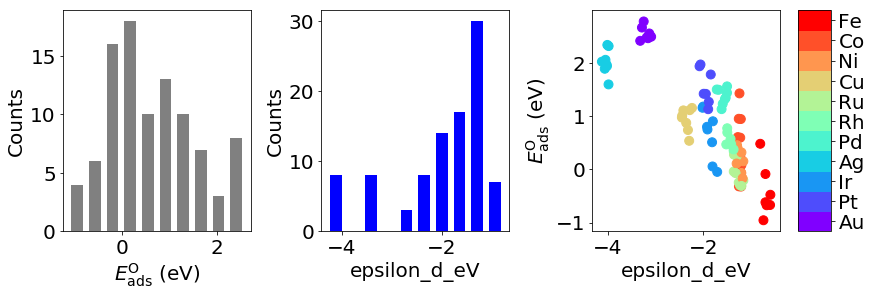

In [48]:
#display the distribution of oxygen adsorption energies within the data set 
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3, constrained_layout=True, figsize=(12,4))

E_ads_O_heights, E_ads_O_bins = np.histogram(df['E_ads_eV'],bins=10)
E_ads_O_width = (E_ads_O_bins[1] - E_ads_O_bins[0])/1.5
ax1.bar(E_ads_O_bins[:-1], E_ads_O_heights, width=E_ads_O_width, color='grey')
ax1.set_ylabel('Counts')
ax1.set_xlabel('$E_{\mathrm{ads}}^{\mathrm{O}}$ (eV)')

#display the distribution of a chosen candidate descriptive parameter within the data set
descriptive_parameter='epsilon_d_eV'
#the possible choices are: bulk_nnd_Ang, site_nnd_Ang, r_d_Ang, V_ad_sq, CN, site_no, epsilon_d_eV, W_d_eV, W_eV, IP_eV, EA_eV, f_d, f_sp, PE, DOS_d_inv_eV, DOS_sp_inv_eV

desc_heights, desc_bins = np.histogram(df[descriptive_parameter],bins=10)
desc_width = (desc_bins[1] - desc_bins[0])/1.5
ax2.bar(desc_bins[:-1], desc_heights, width=desc_width, color='blue')
ax2.set_ylabel('Counts')
ax2.set_xlabel(descriptive_parameter)

N = 11 # number of metals in the data set 
cmap = plt.cm.rainbow
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,N,N+1)
nor = mpl.colors.BoundaryNorm(bounds, cmap.N)

cbar=plt.colorbar(ax3.scatter(df[descriptive_parameter],df['E_ads_eV'],c=df['label_metal'],cmap=cmap, norm=nor, s=80), 
                  ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
cbar.ax.set_yticklabels(['Au','Pt','Ir','Ag','Pd','Rh','Ru','Cu','Ni','Co','Fe'])
ax3.set_xlabel(descriptive_parameter)
ax3.set_ylabel('$E_{\mathrm{ads}}^{\mathrm{O}}$ (eV)');

# Application 1. Surface sites presenting optimal adsorption energies


According to the Sabatier principle, the catalytic performance of a material is maximized when the adsorption energies of key surface species assume intermediate values between too weak and too strong adsorption. For the oxygen-reduction reaction, atomic oxygen (O) is a key intermediate and the optimal adsorption-energy value of $E_{\mathrm{ads,opt}}^{\mathrm{O}}=1.8 ~\mathrm{eV}$ has been <a href="https://pubs.acs.org/doi/10.1021/jp047349j" target="_blank">proposed</a>. We start our analysis by identifying rules describing surface sites with such intermediate oxygen binding strength. To take into account that a range of oxygen adsorption energies around the proposed optimal value might result in catalysts that maximize the performance, we define a target that assumes small values in the window $(1.3, 2.3~\textrm{eV})$ and rapidly increases outside such interval:

\begin{equation}
 \Delta^{\mathrm{O}}= \left( \frac{ E_{\mathrm{ads}}^{\mathrm{O}} - E_{\mathrm{ads,opt}}^{\mathrm{O}} }{0.5 eV} \right)^{2},
\end{equation} 

where energies are expressed in eV. The interesting data points, i.e., the surface sites presenting oxygen adsorption energies close to the optimal proposed value, correspond to low values of $\Delta^{\mathrm{O}}$.

As quality function, we use 

\begin{equation}
 u(SG,P) = \frac{std(P)-std(SG)}{std(P)}, 
\end{equation} 

where $std(SG)$ and $std(P)$ are the standard deviation of the distributions of the target in the SG and in the whole data set, respectively. By using this utility function, we favor the selection of SGs that present narrow distribution of values for the target.

In the following, we evaluating the target $\Delta^{\mathrm{O}}$, choose the candidate descriptive parameters, write the <span style="font-family: monospace;">realkd</span> input files and run the SGD analysis. 

In [44]:
#evaluate the target
#this can be edited to explore different shapes of the penalty of not being near the Sabatier-optimal Eads
df['delta_O']=((df['E_ads_eV']-1.8)/0.5)**2

#choose the candidate descriptive parameters
attribute_list=['bulk_nnd_Ang',
                 'site_nnd_Ang', 
                 'r_d_Ang', 
                 'V_ad_sq', 
                 'CN', 
                 'site_no',
                 'epsilon_d_eV',
                 'W_d_eV',
                 'W_eV', 
                 'IP_eV', 
                 'EA_eV', 
                 'f_d', 
                 'f_sp', 
                 'PE', 
                 'DOS_d_inv_eV',
                 'DOS_sp_inv_eV',
                 'delta_O']
df_input = df[attribute_list].copy()

#write the input file for realkd
def write_input(path, df, id_job, n_cutoffs, algo, dev, n_res, n_seeds, target_key):
    """
    creates the two input files necessary to run the algorithm:
    i) a .json file with calculation details, named "id_job.json", and
    ii) a .xarf file with the data set, named "id_job.xarf".
    function arguments: path(str): path to the folder where the files 
                                   will be written
               df(data frame): data set containing the values for the 
                               candidate descriptive parameters and for
                               the target for all adsorption sites
               id_job(str): job name
               n_cutoffs(int): number of cutoffs to be used in k-Means
                               clustering to generate the propositions
               algo(str): SG search algorithm (PMM_SAMPLER or EMM_SAMPLER)
                          PMM_SAMPLER uses std(SG)/std(P) as utility function
                          whereas EMM_SAMPLER uses the function specified in dev
               dev(str): deviation measure when using EMM_SAMPLER 
                         (e.g. cumulative_jensen_shannon_divergence)
               n_res(int): number of results, i.e., number of top-ranked
                           SGs to display
               n_seeds(int): number of seeds to use for the SG search
               target_key(str): label of the variable to be used as target quantity in SGD
    """
    df.to_csv(path+'/'+id_job+'.csv')
    with open(path+'/'+id_job+'.csv', 'r') as file_in:
        data = file_in.read().splitlines(True)
        
    file_out = open(path+'/'+id_job+'.xarf', 'w')
    file_out.write('@relation '+id_job+'\n')
    file_out.write('@attribute sites name\n')
    for variable in list(df.columns):
        file_out.write('@attribute '+variable+' numeric\n')
    file_out.write("@data\n")
    file_out.close()

    with open(path+'/'+id_job+'.xarf', 'a') as file_out:
        file_out.writelines(data[1:])
        file_out.close()
    
    input_file = {}
    input_file = {"type" : "productWorkScheme",
                  "id" : id_job,
                  "workspaces" : [ {
                                "type" : "workspaceFromXarf",
                                "id" : id_job,
                                "datafile" : id_job+".xarf",
                                "propScheme": {"type": "standardPropScheme",
                                                "defaultMetricRule": {"type": "kmeansPropRule",
                                                                       "numberOfCutoffs": n_cutoffs,
                                                                       "maxNumberOfIterations": 1000}}} ],
                    "computations" : [ {
                                "type" : "legacyComputation",
                                "id" : "subgroup_analysis",
                                "algorithm" : algo,
                                "parameters" : {
                                    "dev_measure": dev,
                                    "attr_filter" : "[]",
                                    "cov_weight" : "1.0",
                                    "num_res" : n_res,
                                    "num_seeds" : n_seeds,
                                    "targets" : "["+target_key+"]"
                                             }
                  }],
                  "computationTimeLimit" : 360000
                     }
    with open(path+'/'+id_job+'.json','w') as outfile:
        json.dump(input_file, outfile, indent=4)

id_job='oxygen_adsorption'
write_input('./', df_input, id_job, 10, 'PMM_SAMPLER','', 2000, 80000, 'delta_O')  

In [42]:
#run realkd
#depending on the chosen parameters, this can take a couple of minutes
os.system('java -jar data/sgd-alloys-oxygen-reduction-evolution/realkd-0.7.2-jar-with-dependencies.jar '+id_job+'.json') 

0

Once the SGD analysis is finished, we read the list of identified SGs in the output file and look at the SG which maximizes the quality-function value. We also select, among the SGs that maximize the quality-function values (within 40% of the maximum quality-function value), the SG presenting the highest $u(SG,P)$ value. We look at the distribution of target values within these SGs and their rules. 

SG with the maximum Q(SG,P):
 
Q(SG,P)=0.330 
 s(SG)/s(P)= 0.442 
 u(SG,P)= 0.746 
 target average= 1.738 
 rules: V_ad_sq<=3.9 & epsilon_d_eV<=-1.46

SG with the maximum u(SG,P) among the SGs within 40 % of the maximum Q(SG,P):
 
Q(SG,P)=0.222 
 s(SG)/s(P)= 0.242 
 u(SG,P)= 0.919 
 target average= 0.595 
 rules: IP_eV<=8.959 & bulk_nnd_Ang>2.7435 
 other rules corresponding to the same subselection of data points are: 
IP_eV<=8.959 & bulk_nnd_Ang>2.7435
IP_eV<=8.959 & IP_eV>=7.5175 & site_nnd_Ang>=2.6335
IP_eV<=8.959 & IP_eV>=7.5175 & V_ad_sq>=2.26
CN>=7.0 & IP_eV<=8.959 & IP_eV>=7.5175 & r_d_Ang>=0.78


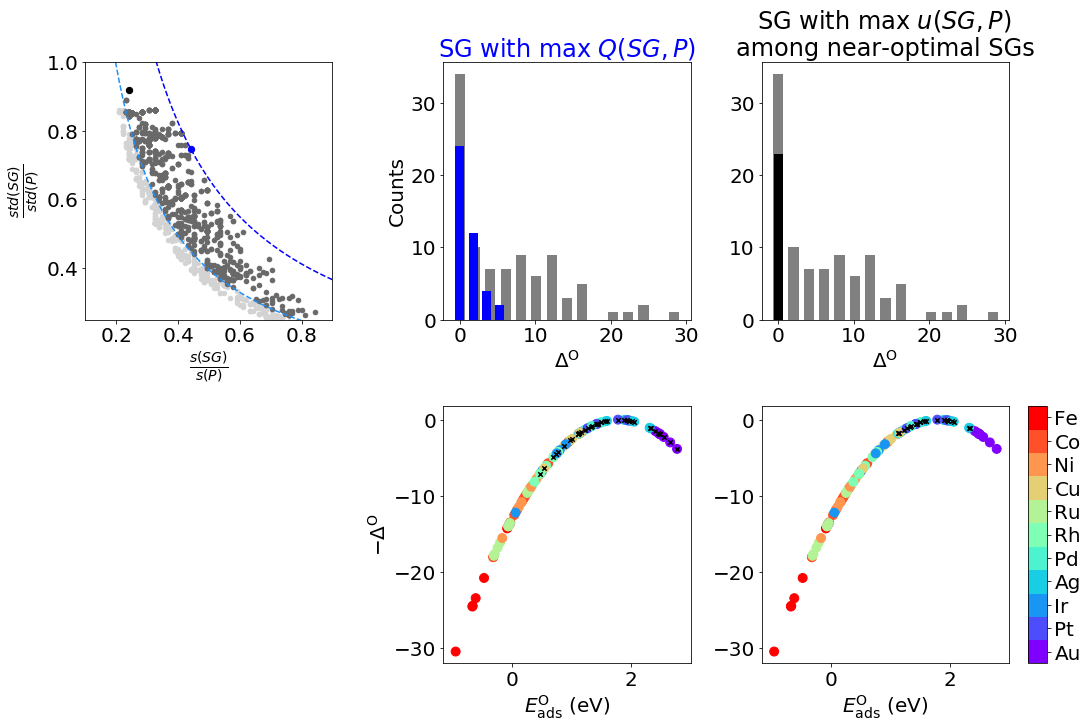

In [49]:
def get_sg_info(data,index):
    """
    reads the SGD output .json file and returns the following information 
    on a specific identified SGs: coverage, utility function, target mean value within the SG,
                           the SG rules and the parameters enterning the rulesattributes
    function arguments: data(str): path to the output .json file
                        index(int): index of the SG for which the information is obtained
                                    note that the SGs are ordered by decreasing quality-function values
    """
    coverage=data[index].get('measurements')[0].get('value')
    utility_function=data[index].get('measurements')[1].get('value')
    target_mean=data[index].get('descriptor').get('targetLocalModel').get('means')
    list_attributes=data[index].get('descriptor').get('selector').get('attributes')
    list_operators=[]
    list_cutoffs=[]
    constraints=[]
    for i in list(range(0,len(list_attributes))):
        list_operators.append(data[index].get('descriptor').get('selector').get('constraints')[i].get('type'))
        list_cutoffs.append(data[index].get('descriptor').get('selector').get('constraints')[i].get('value'))

    list_operators = [op.replace('lessOrEquals', '<=') for op in list_operators]
    list_operators = [op.replace('greaterOrEquals', '>=') for op in list_operators]
    list_operators = [op.replace('lessThan', '<') for op in list_operators]
    list_operators = [op.replace('greaterThan', '>') for op in list_operators]
    
    for i in list(range(0,len(list_attributes))):
        if i == 0:
            constraints=list_attributes[0]+list_operators[0]+str(list_cutoffs[0])
        else:
            constraints=constraints+' & '+list_attributes[i]+list_operators[i]+str(list_cutoffs[i])
    return(coverage,utility_function,*target_mean,constraints,list_attributes)

dir_list = os.listdir('./output/'+id_job+'/')
file_results='./output/'+id_job+'/'+dir_list[0]+'/results/'+id_job+'_subgroup_analysis.json'

#threshold used to define "near-optimal quality-function values"
#the value considered in the publication is 0.60. This means that SGs with quality-function values 
#within 40% of the maximum (optimal) quality-function value are considered near-optimal 
threshold=0.60

with open(file_results) as json_file:
    data = json.load(json_file)
    #SG with maximum quality-function value
    sg_max_Q=get_sg_info(data,0)
    Q_max=sg_max_Q[0]*sg_max_Q[1]
    coverage_list=[get_sg_info(data,i)[0] for i in range(len(data))]
    utility_function_list=[get_sg_info(data,i)[1] for i in range(len(data))]
    #selection of SGs with near-optimal quality-funcion values using the threshold value
    coverage_list_selected=[]
    utility_function_list_selected=[]
    for i in range(len(data)):
        sg_info=get_sg_info(data,i)
        if sg_info[0]*sg_info[1] >= threshold*Q_max:
            coverage_list_selected.append(sg_info[0])
            utility_function_list_selected.append(sg_info[1])

    max_utility=max(utility_function_list_selected)
    list_index_max_utility_function=[i for i, j in enumerate(utility_function_list) if j == max_utility]
    #SG with maximum utility-function value among the near-optimal SGs
    sg_max_u=get_sg_info(data,list_index_max_utility_function[0])

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, constrained_layout=True, figsize=(15,10))

ax1.scatter(coverage_list,utility_function_list,c='lightgrey',s=20)
ax1.scatter(coverage_list_selected,utility_function_list_selected,c='dimgrey',s=20)
ax1.scatter(sg_max_Q[0],sg_max_Q[1],c='blue',s=40)
ax1.scatter(sg_max_u[0],sg_max_u[1],c='black',s=40)

x=np.arange(0.005,1,0.001).tolist()
Q_max_function=[sg_max_Q[0]*sg_max_Q[1]/x[i] for i in range(len(x))]
ax1.plot(x,Q_max_function,c='blue',linestyle='dashed')
Q_max_function_threshold=[threshold*sg_max_Q[0]*sg_max_Q[1]/x[i] for i in range(len(x))]
ax1.plot(x,Q_max_function_threshold,c='dodgerblue',linestyle='dashed')
ax1.set_xlim(0.1,0.9)
ax1.set_ylim(0.25,1)
ax1.set_ylabel('$\\frac{std(P)-std(SG)}{std(P)}$')
ax1.set_xlabel('$\\frac{s(SG)}{s(P)}$')

delta_O_heights, delta_O_bins = np.histogram(df['delta_O'],bins=15)
delta_O_width = (delta_O_bins[1] - delta_O_bins[0])/1.5
ax2.bar(delta_O_bins[:-1], delta_O_heights, width=delta_O_width, color='grey')

ax2.set_ylabel('Counts')
ax2.set_xlabel('$\\Delta^{\mathrm{O}}$')
sg_max_Q_data=df.query(sg_max_Q[3])
sg_max_Q_heights, sg_max_Q_bins = np.histogram(sg_max_Q_data['delta_O'],bins=4)
sg_max_Q_width = (sg_max_Q_bins[1] - sg_max_Q_bins[0])/1.5
ax2.bar(sg_max_Q_bins[:-1], sg_max_Q_heights, width=sg_max_Q_width, color='blue')

ax3.bar(delta_O_bins[:-1], delta_O_heights, width=delta_O_width, color='grey')
ax3.set_xlabel('$\\Delta^{\mathrm{O}}$')
sg_max_u_data=df.query(sg_max_u[3])
sg_max_u_heights, sg_max_u_bins = np.histogram(sg_max_u_data['delta_O'],bins=1)
sg_max_u_width = (sg_max_u_bins[1] - sg_max_u_bins[0])/1.5
ax3.bar(sg_max_u_bins[:-1], sg_max_u_heights, width=sg_max_u_width, color='k')

ax5.scatter(df['E_ads_eV'],-df['delta_O'],c=df['label_metal'],cmap=cmap, norm=nor, s=80)
ax5.scatter(sg_max_Q_data['E_ads_eV'],-sg_max_Q_data['delta_O'],c='black',s=20, marker='x')
cbar=plt.colorbar(ax6.scatter(df['E_ads_eV'],-df['delta_O'],c=df['label_metal'],cmap=cmap, norm=nor, s=80), 
                  ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
ax6.scatter(sg_max_u_data['E_ads_eV'],-sg_max_u_data['delta_O'],c='black',s=20, marker='x')

cbar.ax.set_yticklabels(['Au','Pt','Ir','Ag','Pd','Rh','Ru','Cu','Ni','Co','Fe'])

ax5.set_xlabel('$E_{\mathrm{ads}}^{\mathrm{O}}$ (eV)')
ax5.set_ylabel('$-\\Delta^{\mathrm{O}}$')
ax6.set_xlabel('$E_{\mathrm{ads}}^{\mathrm{O}}$ (eV)')

ax2.set_title('SG with max $Q(SG,P)$', color='blue')
ax3.set_title('SG with max $u(SG,P)$ \namong near-optimal SGs')
ax4.axis('off')

print('SG with the maximum Q(SG,P):\n',
      '\nQ(SG,P)='"{:.3f}".format(sg_max_Q[0]*sg_max_Q[1]),
      '\n s(SG)/s(P)=',"{:.3f}".format(sg_max_Q[0]),  
      '\n u(SG,P)=', "{:.3f}".format(sg_max_Q[1]),
      '\n target average=', "{:.3f}".format(sg_max_Q[2]),
      '\n rules:',
       sg_max_Q[3])

print('\nSG with the maximum u(SG,P) among the SGs within '
      "{:.0f}".format(100*(1-threshold)), '% of the maximum Q(SG,P):\n', 
      '\nQ(SG,P)='"{:.3f}".format(sg_max_u[0]*sg_max_u[1]),
      '\n s(SG)/s(P)=',"{:.3f}".format(sg_max_u[0]),  
      '\n u(SG,P)=', "{:.3f}".format(sg_max_u[1]),
      '\n target average=', "{:.3f}".format(sg_max_u[2]),
      '\n rules:',
       sg_max_u[3],
       '\n other rules corresponding to the same subselection of data points are: ')
sg_rules=str()
for i in range(len(list_index_max_utility_function)):
    sg=get_sg_info(data,list_index_max_utility_function[i])
    if i==0:
        sg_rules=sg[3]
    else:
        sg_rules=sg_rules+' & '+sg[3]
    print(sg[3])


For further analysis, we select the SG with maximum $u(SG,P)$ among near-optimal SGs. We look at the subselection of (training) data points which are part of this SG.

In [100]:
#display subselection of data points in the SG with maximum utility-function value
#among near-optimal SGs
sg_max_u_data.index.tolist()

['O_Ag_211_bridge2-s',
 'O_Ag_211_fcc-s',
 'O_Ag_211_fcc-t',
 'O_Ag_211_hcp-s',
 'O_Ag_211_hcp-t',
 'O_Pd_211_bridge2-s',
 'O_Pd_211_fcc-s',
 'O_Pd_211_fcc-t',
 'O_Pd_211_hcp-s',
 'O_Pd_211_hcp-t',
 'O_Pt_211_bridge2-s',
 'O_Pt_211_fcc-s',
 'O_Pt_211_fcc-t',
 'O_Pt_211_hcp-t',
 'O_Ag_111_fcc',
 'O_Pd_111_fcc',
 'O_Pt_111_fcc',
 'O_Ag_110_shortbridge',
 'O_Pd_110_shortbridge',
 'O_Pt_110_shortbridge',
 'O_Ag_100_hollow',
 'O_Pd_100_hollow',
 'O_Pt_100_hollow']

## Making predictions with the learned SG rules

To assess the transferability of the SG rules trained using monometallic systems to alloys, we use an additional alloy data set. This alloy data set contains information on (211) surfaces of 36 bimetallic alloys with 1:1 atomic ratio. 

In [59]:
#read alloy data set 
#note that the adsorption-energy values are ony available for part of the alloy data set (used as test set)
#for this reason, some cells are displayed as "NaN"
df_alloy=pd.read_csv('data/sgd-alloys-oxygen-reduction-evolution/alloys.csv').set_index('Samples')
#display data set
df_alloy.head(n=10)

,E_ads_OH_eV,E_ads_OH_scaling_eV,E_ads_O_eV,bulk_nnd_Ang,site_nnd_Ang,r_d_Ang,V_ad_sq,CN,site_no,epsilon_d_eV,W_d_eV,W_eV,IP_eV,EA_eV,f_d,f_sp,PE,DOS_d_inv_eV,DOS_sp_inv_eV
Samples,,,,,,,,,,,,,,,,,,,
O_AgAu_sbr1,0.571,0.592320,2.400,2.988,2.941,0.95,2.805,7.000,2,-3.514,1.131,4.854,8.401,1.807,9.790,1.114,2.235,0.053,0.268
O_AgAu_sbr2,NaN,NaN,NaN,2.988,2.941,0.95,2.805,7.000,2,-3.514,1.131,4.854,8.401,1.807,9.790,1.114,2.235,0.053,0.268
O_AgAu_sfcc1,0.786,1.059526,2.263,2.987,2.965,0.93,2.623,8.333,3,-3.679,1.180,4.712,8.126,1.639,9.786,1.136,2.133,0.056,0.239
O_AgAu_sfcc2,1.034,1.106019,2.347,2.988,2.954,0.97,2.987,8.333,3,-3.482,1.262,4.996,8.676,1.974,9.754,1.223,2.337,0.066,0.268
O_AgAu_shcp1,NaN,NaN,2.223,2.988,2.949,0.97,2.987,7.667,3,-3.457,1.215,4.996,8.676,1.974,9.763,1.186,2.337,0.064,0.269
O_AgAu_shcp2,0.717,NaN,2.252,2.987,2.951,0.93,2.623,7.667,3,-3.638,1.138,4.712,8.126,1.639,9.796,1.107,2.133,0.051,0.253
O_AgAu_tfcc1,NaN,NaN,2.441,2.988,2.976,0.97,2.987,9.667,3,-3.575,1.334,4.996,8.676,1.974,9.731,1.281,2.337,0.073,0.244
O_AgAu_tfcc2,NaN,NaN,2.374,2.987,2.978,0.93,2.623,9.667,3,-3.756,1.257,4.712,8.126,1.639,9.764,1.201,2.133,0.060,0.228
O_AgAu_thcp1,NaN,NaN,2.580,2.988,2.969,0.97,2.987,9.333,3,-3.564,1.316,4.996,8.676,1.974,9.740,1.266,2.337,0.072,0.249


The alloy data set is split in two subsets: 

(i) The test set contains 4 alloy compositions. For this test set, the oxygen adsorption energies are explicitly calculated by DFT. This data set is used for evaluating the performance of the SG rules on the alloys. 

(ii) The exploitation set contains only the descriptive parameters for 32 alloy compositions and it is used for the screening of new promising alloys and surface sites. 

In [60]:
#split into test and extrapolation
df_alloy['delta_O']=((df_alloy['E_ads_O_eV']-1.8)/0.5)**2
df_alloy_test=df_alloy.dropna(subset=['E_ads_O_eV'])
#apply SG rules to alloy test set
sg_alloy_test=df_alloy_test.query(sg_max_u[3])

The SG rules are first applied to the alloy test set to evaluate their performance. We look at the histogram associated to the distrbution of the target $\Delta^{\mathrm{O}}$ for the whole alloy test set and for the portion of the alloy test set selected by the SG rules derived based on the monometallic systems.

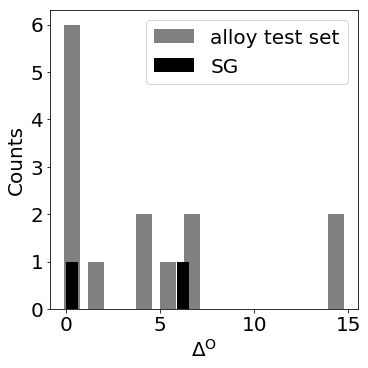

In [109]:
fig, (ax1) = plt.subplots(1,1, constrained_layout=True, figsize=(5,5))
delta_O_alloy_heights, delta_O_alloy_bins = np.histogram(df_alloy_test['delta_O'].dropna(),bins=12)
delta_O_alloy_width = (delta_O_alloy_bins[1] - delta_O_alloy_bins[0])/1.5
ax1.bar(delta_O_alloy_bins[:-1], delta_O_alloy_heights, width=delta_O_alloy_width, color='grey', label='alloy test set')

sg_alloy_heights, sg_alloy_bins = np.histogram(sg_alloy_test['delta_O'].dropna(),bins=7)
sg_alloy_width = (sg_alloy_bins[1] - sg_alloy_bins[0])/1.5
ax1.bar(sg_alloy_bins[:-1], sg_alloy_heights, width=sg_alloy_width, color='black', label='SG')
ax1.legend(loc='upper right')

ax1.set_ylabel('Counts')
ax1.set_xlabel('$\\Delta^{\mathrm{O}}$');

Finally, the SG rules are applied to the alloy exploitation set to select new promising alloys and surface sites.

In [62]:
#apply SG rules to alloy extrapolation set
df_alloy_exploitation=pd.concat([df_alloy,df_alloy_test]).drop_duplicates(keep=False)
df_alloy_exploitation.query(sg_rules).index.tolist()

['O_AgAu_sbr2',
 'O_AgIr_sfcc1',
 'O_AgIr_sfcc2',
 'O_AgIr_shcp1',
 'O_AgIr_shcp2',
 'O_AgIr_tfcc1',
 'O_AgIr_tfcc2',
 'O_AgIr_thcp1',
 'O_AgIr_thcp2',
 'O_AgPd_tfcc1',
 'O_AgPt_sfcc1',
 'O_AgPt_sfcc2',
 'O_AgPt_shcp1',
 'O_AgPt_shcp2',
 'O_AgPt_tfcc1',
 'O_AgPt_tfcc2',
 'O_AgPt_thcp1',
 'O_AgPt_thcp2',
 'O_AuCu_sfcc2',
 'O_AuCu_shcp2',
 'O_AuCu_tfcc2',
 'O_AuCu_thcp2',
 'O_CuPt_sfcc1',
 'O_CuPt_shcp1',
 'O_CuPt_tfcc1',
 'O_CuPt_thcp1',
 'O_NiAu_sfcc1',
 'O_NiAu_shcp1',
 'O_NiAu_tfcc1',
 'O_NiAu_thcp1',
 'O_PdAu_sfcc1',
 'O_PdAu_sfcc2',
 'O_PdAu_shcp1',
 'O_PdAu_shcp2',
 'O_PdAu_tfcc1',
 'O_PdAu_tfcc2',
 'O_PdAu_thcp1',
 'O_PdAu_thcp2',
 'O_PdIr_sfcc1',
 'O_PdIr_sfcc2',
 'O_PdIr_shcp1',
 'O_PdIr_shcp2',
 'O_PdIr_tfcc1',
 'O_PdIr_tfcc2',
 'O_PdIr_thcp1',
 'O_PdIr_thcp2',
 'O_PdPt_sfcc1',
 'O_PdPt_sfcc2',
 'O_PdPt_shcp1',
 'O_PdPt_shcp2',
 'O_PdPt_tfcc1',
 'O_PdPt_tfcc2',
 'O_PdPt_thcp1',
 'O_PdPt_thcp2',
 'O_PtRh_shcp2',
 'O_RhAg_sfcc1',
 'O_RhAg_shcp1',
 'O_RhAg_tfcc1',
 'O_RhAg_thcp1'

# Application 2. Surface sites deviating from linear-scaling relationships


The adsorption energies of surface species presenting some similarity (e.g., O and OH) on different materials are often related to each other according to approximately linear relationships. Linear fits, refered to as <a href="https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.99.016105" target="_blank">linear-scaling relations</a>, have been thus exploited in catalyst screening approaches to reduce the number of adsorption energies that need to be evaluated for the investigation of a certain catalytic process. However, the linear-scaling relationships might impose a limit to catalyst design, since they imply that that the adsorption energies of two related species cannot be tuned independently. In the oxygen-evolution reaction, for instance, the adsorption energies of the three key intermediates, O, OH, and OOH, are correlated and the O adsorption energy needs be decreased with respect to OOH adsorption energy in order to decrease the limiting potential and thus maximize the performance. Therefore, materials and surface sites deviating from these linear models are the interesting ones.

To  illustrate  how  the  SGD  approach  can  be  used  to find rules describing surface sites that deviate the most from linear-scaling relationships, we search for SGs describing fcc(211) surface sites of monometallic surfaces providing high deviations from linear models relating the adsorption energy values of atomic oxygen (O) and hydroxyl (OH). We use a data set of 36 surface sites, in which both O and OH present (meta)stable adsorption.
As target for the SGD analysis, we use

\begin{equation}
\Delta^{\mathrm{O,OH}}_{\mathrm{scaling}}=|E_{\mathrm{ads,DFT}}^{\mathrm{OH}} - E_{\mathrm{ads,scaling}}^{\mathrm{OH}}|,
\end{equation} 

the absolute difference between the OH adsorption energy estimation by the scaling relation $E_{\mathrm{ads,scaling}}^{\mathrm{OH}}$ and the actual DFT-calculated value $E_{\mathrm{ads,DFT}}^{\mathrm{OH}}$. In this way, the interesting data points, i.e., the 
surface sites that are worst described by the linear model, correspond to high values of $\Delta^{\mathrm{O,OH}}_{\mathrm{scaling}}$. Most of the observations in the data set correspond to low $\Delta^{\mathrm{O,OH}}_{\mathrm{scaling}}$ values. We are thus interested  in SGs with an overall distribution of the target value as different as possible from the distribution of this quantity in the whole data set. This requirement can be introduced in the SGD by means of the following utility function:

\begin{equation}
 u(SG,P) = D_{\mathrm{cJS}}(SG,P).
\end{equation} 

$D_{\mathrm{cJS}}(SG,P)$ is the <a href="https://eda.mmci.uni-saarland.de/pubs/2015/cjs-vreeken,nguyen-full.pdf" target="_blank"> cumulative-distribution-function formulation of the Jensen-Shannon divergence </a> between the distribution of the target values in the SG and the distribution of the target values in the whole data set. $D_{\mathrm{cJS}}(SG,P)$ measures the dissimilarity between two distributions. It assumes small values for similar distributions and increases as the distributions have different standard deviations and/or mean values. 

In order to get an intuition on how $D_{\mathrm{cJS}}(SG,P)$ influences the SGD approach, we evaluate the Jensen-Shannon divergence between two normal distributions $p$ and $q$ which have different mean and standard deviations, i.e., $p=\mathcal{N}(0,1)$ and $q=\mathcal{N}(\mu_{q},\sigma^2_{q})$. $p$ and $q$ are shown in grey and blue, respectively, in the figure below. In the context of SGD, $p$ can be seen as the distribution of the target over the whole data set, whereas $q$ is analogous to the several possible SGs of the data set. Further details about $D_{\mathrm{cJS}}(SG,P)$ and its application to SGD can be found <a href="https://static-content.springer.com/esm/art%3A10.1007%2Fs11244-021-01502-4/MediaObjects/11244_2021_1502_MOESM1_ESM.docx" target="_blank">here</a>.

The Jensen-Shannon divergence between N(0,1) and N( 2.00 , 0.40 ) is  0.668 .


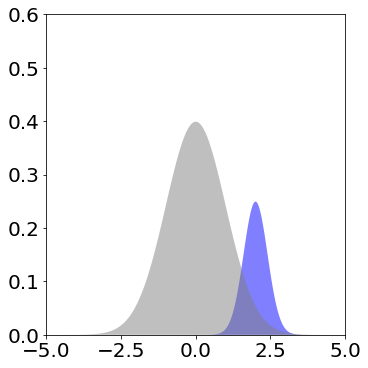

In [112]:
#choose the mean and squared standard deviation defining the normal distribution q
q_mean=2
q_std=0.4

fig, (ax1) = plt.subplots(1,1, constrained_layout=True, figsize=(5,5))
x = np.linspace(-10.0, 10.0, 10000)
def calc_js(p,q):
    'evaluates the Jensen-Shannon divergence between distributions p and q'
    m = (p+q)/2
    kl_pm = entropy(p, m)
    kl_qm = entropy(q, m)
    #the Jensen-Shannon divergence is calculated as an average of Kullback–Leibler divergences (relative entropies)
    js = (kl_pm + kl_qm)/2
    return(js)
p = norm.pdf(x, loc=0, scale=1)
q = 0.25*norm.pdf(x, loc=q_mean, scale=q_std)
js=calc_js(p,q)

ax1.fill_between(x, q, facecolor="blue", alpha=0.5)
ax1.fill_between(x, p, facecolor="grey", alpha=0.5)
ax1.set_ylim(0,0.6)
ax1.set_xlim(-5,5)

print('The Jensen-Shannon divergence between N(0,1) and N(',
      "{:.2f}".format(q_mean),',',"{:.2f}".format(q_std),') is ',"{:.3f}".format(js),'.')

We start by importing the data.

In [66]:
#import data set
df_scaling=pd.read_csv('data/sgd-alloys-oxygen-reduction-evolution/scaling_data.csv').set_index('Samples')
#display data set
df_scaling.head(n=10)
#label_metal and label_ads_site enumerate the different metals and adsorption sites, respectively, and are used for plotting (see below)

,label_metal,label_ads_site,E_ads_OH_eV,E_ads_O_eV,bulk_nnd_Ang,site_nnd_Ang,r_d_Ang,V_ad_sq,CN,site_no,epsilon_d_eV,W_d_eV,W_eV,IP_eV,EA_eV,f_d,f_sp,PE,DOS_d_inv_eV,DOS_sp_inv_eV
Samples,,,,,,,,,,,,,,,,,,,,
O_Ag_211_bridge2-s,3,0,0.332,2.338,2.985,2.946,0.89,2.26,7.0,2,-4.008,0.934,4.427,7.576,1.304,9.856,1.051,1.93,0.031,0.290
O_Au_211_bridge2-s,0,0,0.742,2.492,2.990,2.936,1.01,3.35,7.0,2,-3.127,1.323,5.280,9.226,2.309,9.732,1.200,2.54,0.079,0.260
O_Co_211_bridge2-s,9,0,-0.814,-0.044,2.509,2.468,0.76,1.34,7.0,2,-1.256,1.870,4.828,7.881,0.662,7.687,1.143,1.88,1.225,0.242
O_Co_211_bridge3-s,9,0,-0.123,0.606,2.509,2.488,0.76,1.34,8.5,2,-1.274,1.990,4.828,7.881,0.662,7.677,1.227,1.88,1.118,0.188
O_Cu_211_bridge2-s,7,0,-0.286,1.112,2.603,2.556,0.67,1.00,7.0,2,-2.282,0.955,4.719,7.726,1.236,9.722,1.129,1.90,0.090,0.264
O_Ir_211_bridge2-s,2,0,-0.496,-0.048,2.753,2.699,1.08,4.45,7.0,2,-1.706,2.442,5.489,9.121,1.564,7.800,1.214,2.20,1.538,0.258
O_Ni_211_bridge2-s,8,0,-0.646,0.152,2.502,2.464,0.71,1.16,7.0,2,-1.158,1.645,4.945,7.640,1.157,8.860,1.141,1.91,1.873,0.218
O_Pd_211_bridge2-s,4,0,0.209,1.438,2.819,2.790,0.94,2.78,7.0,2,-1.500,1.244,5.210,8.337,0.562,9.334,0.682,2.20,2.150,0.150
O_Pt_211_bridge2-s,1,0,0.164,1.130,2.838,2.781,1.04,3.90,7.0,2,-1.895,1.891,5.750,8.959,2.125,8.812,1.101,2.28,1.720,0.176


Then, we estimate the linear-scaling relations for the available data and evaluate the $\Delta^{\mathrm{O,OH}}_{\mathrm{scaling}}$ target. We also plot the histogram associated to the distributions of a chosen candidate descriptive parameter. 

For the bridge-2-s site, the scaling relation is:  
0.5043 x - 0.618
For the fcc-s site, the scaling relation is:  
0.4946 x - 0.1013
For the fcc-t site, the scaling relation is:  
0.4438 x + 0.1166
For the hcp-t site, the scaling relation is:  
0.4046 x + 0.1641


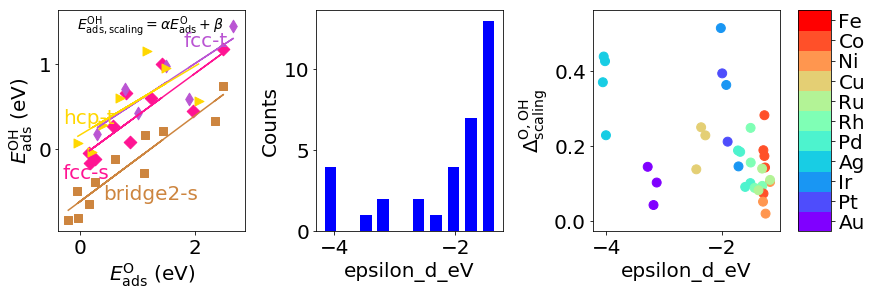

In [71]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, constrained_layout=True, figsize=(12,4))

color=['peru','deeppink','mediumorchid','gold']
marker=['s','D','d','>']
sites=['bridge-2-s','fcc-s','fcc-t','hcp-t']
E_ads_OH_estimated=[]

#establish a linear model for each type of adsorption site
for i in [0,1,2,3]:
    data_site=df_scaling.query('label_ads_site =='+str(i))
    ax1.scatter(data_site['E_ads_O_eV'],data_site['E_ads_OH_eV'],color=color[i],marker=marker[i],s=80)
    linear_model= np.polyfit(data_site['E_ads_O_eV'], data_site['E_ads_OH_eV'], 1)
    prediction= np.poly1d(linear_model)
    ax1.plot(data_site['E_ads_O_eV'],prediction(data_site['E_ads_O_eV']),color=color[i])
    E_ads_OH_estimated.extend(list(prediction(data_site['E_ads_O_eV'])))
    print('For the',sites[i],'site, the scaling relation is:', prediction)
#include estimated OH adsorption energies in the data set
df_scaling['E_ads_OH_estimated_eV']=E_ads_OH_estimated

ax1.set_ylabel('$E_{\mathrm{ads}}^{\mathrm{OH}}$ (eV)')
ax1.set_xlabel('$E_{\mathrm{ads}}^{\mathrm{O}}$ (eV)')
ax1.text(-0.05,1.4,'$E_{\mathrm{ads,scaling}}^{\mathrm{OH}} = \\alpha E_{\mathrm{ads}}^{\mathrm{O}} + \\beta $',color='k',fontsize=14)
ax1.text(0.4,-0.6,'bridge2-s',color='peru')
ax1.text(-0.3,-0.35,'fcc-s',color='deeppink')
ax1.text(1.8,1.2,'fcc-t',color='mediumorchid')
ax1.text(-0.3,0.3,'hcp-t',color='gold')

#evaluate the target
df_scaling['delta_O_OH']=np.abs(df_scaling['E_ads_OH_eV']-df_scaling['E_ads_OH_estimated_eV'])

#display the distribution of a chosen candidate descriptive parameter within the data set
descriptive_parameter='epsilon_d_eV'
#the possible choices are: bulk_nnd_Ang, site_nnd_Ang, r_d_Ang, V_ad_sq, CN, site_no, epsilon_d_eV, W_d_eV, W_eV, IP_eV, EA_eV, f_d, f_sp, PE, DOS_d_inv_eV, DOS_sp_inv_eV
desc_heights, desc_bins = np.histogram(df_scaling[descriptive_parameter],bins=10)
desc_width = (desc_bins[1] - desc_bins[0])/1.5
ax2.bar(desc_bins[:-1], desc_heights, width=desc_width, color='blue')
ax2.set_ylabel('Counts')
ax2.set_xlabel(descriptive_parameter)

cbar=plt.colorbar(ax3.scatter(df_scaling[descriptive_parameter],df_scaling['delta_O_OH'],c=df_scaling['label_metal'],cmap=cmap, norm=nor, s=80), 
                  ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
cbar.ax.set_yticklabels(['Au','Pt','Ir','Ag','Pd','Rh','Ru','Cu','Ni','Co','Fe'])
ax3.set_xlabel(descriptive_parameter)
ax3.set_ylabel('$\\Delta^{\mathrm{O,OH}}_{\mathrm{scaling}}$');

We can then choose the candidate descriptive parameters, write the input files and run the SGD analysis. 

In [72]:
#choose the descriptive parameters for the SGD analysis
#write the input file for realkd
attribute_list_scaling=['bulk_nnd_Ang',
                 'site_nnd_Ang', 
                 'r_d_Ang', 
                 'V_ad_sq', 
                 'CN', 
                 'site_no',
                 'epsilon_d_eV',
                 'W_d_eV',
                 'W_eV', 
                 'IP_eV', 
                 'EA_eV', 
                 'f_d', 
                 'f_sp', 
                 'PE', 
                 'DOS_d_inv_eV',
                 'DOS_sp_inv_eV',
                 'delta_O_OH']


df_input_scaling = df_scaling[attribute_list_scaling].copy()
id_job_scaling='scaling_relations'
write_input('./', df_input_scaling, id_job_scaling, 10,
            'EMM_SAMPLER','cumulative_jensen_shannon_divergence',
            2000, 80000, 'delta_O_OH')
#run realkd
#depending on the chosen parameters, this can take a couple of minutes
os.system('java -jar data/sgd-alloys-oxygen-reduction-evolution/realkd-0.7.2-jar-with-dependencies.jar '+id_job_scaling+'.json')

0

Once the SGD analysis is done, we read the list of identified SGs in the output file and look at the SG which maximizes the quality-function value. We analyze the rules describing this SG as well as the distribution of target values within the subselected data points. 

SG with the maximum  $Q(SG,P)$:
 
Q(SG,P)=0.081 
 s(SG)/s(P)= 0.176 
 u(SG,P)= 0.457 
 target average= 0.418 
 rules: CN>=7.6665 & DOS_d_inv_eV<=1.994 & bulk_nnd_Ang<=2.985 & epsilon_d_eV<=-1.545 & site_nnd_Ang>=2.7045000000000003 
 other rules corresponding to the same subselection of data points are:

CN>=7.6665 & DOS_d_inv_eV<=1.994 & bulk_nnd_Ang<=2.985 & epsilon_d_eV<=-1.545 & site_nnd_Ang>=2.7045000000000003
EA_eV<=2.125 & EA_eV>1.236 & site_no>=3.0
EA_eV>1.236 & IP_eV<=9.121 & site_no>=2.5
CN>=8.333 & EA_eV>1.236 & IP_eV<=9.121
EA_eV>1.236 & PE<=2.28 & site_no>=2.5
CN>=8.333 & EA_eV>1.236 & PE<=2.28
CN>=7.6665 & EA_eV>1.236 & PE<=2.28
EA_eV>1.236 & IP_eV<=9.121 & site_no>=3.0
EA_eV>1.236 & bulk_nnd_Ang<=2.985 & site_no>=2.5
CN>=8.333 & EA_eV>1.236 & bulk_nnd_Ang<=2.985
EA_eV>1.236 & PE<=2.28 & site_no>=3.0
CN>=7.6665 & EA_eV>1.236 & bulk_nnd_Ang<=2.985
EA_eV<=2.125 & EA_eV>1.236 & site_no>=2.5
CN>=8.333 & EA_eV<=2.125 & EA_eV>1.236
CN>=7.6665 & EA_eV<=2.125 & EA_eV>1.236
EA_eV>1

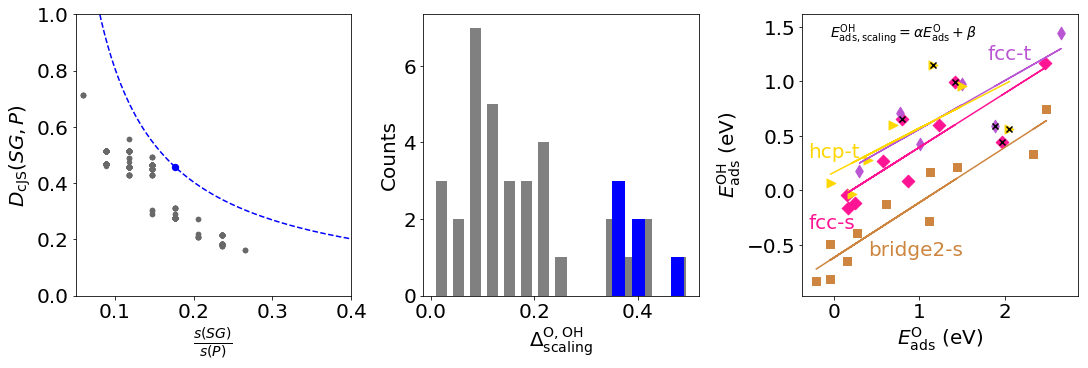

In [101]:
dir_list_scaling = os.listdir('./output/'+id_job_scaling+'/')
file_results='./output/'+id_job_scaling+'/'+dir_list_scaling[0]+'/results/'+id_job_scaling+'_subgroup_analysis.json'

with open(file_results) as json_file:
    data = json.load(json_file)
    #SG with maximum quality-function value
    sg_max_Q = get_sg_info(data,0)
    coverage_list = [get_sg_info(data,i)[0] for i in range(len(data))]
    utility_function_list = [get_sg_info(data,i)[1] for i in range(len(data))]
    #identifying indices of SGs with maximum quality-funcion value
    list_max_Q=[]
    for i in range(len(data)):
        sg_info=get_sg_info(data,i)
        if sg_info[0]*sg_info[1] == sg_max_Q[0]*sg_max_Q[1]:
            list_max_Q.append(i)

fig, ((ax1,ax2,ax3)) = plt.subplots(1,3, constrained_layout=True, figsize=(15,5))
ax1.scatter(coverage_list,utility_function_list,c='dimgrey',s=20)
ax1.scatter(sg_max_Q[0],sg_max_Q[1],c='blue',s=40)

Q_max_function=[sg_max_Q[0]*sg_max_Q[1]/x[i] for i in range(len(x))]
ax1.plot(x,Q_max_function,c='blue',linestyle='dashed')

ax1.set_xlim(0.05,0.4)
ax1.set_ylim(0,1)
ax1.set_ylabel('$D_{\mathrm{cJS}}(SG,P)$')
ax1.set_xlabel('$\\frac{s(SG)}{s(P)}$')

delta_O_OH_heights, delta_O_OH_bins = np.histogram(df_scaling['delta_O_OH'],bins=15)
delta_O_OH_width = (delta_O_OH_bins[1] - delta_O_OH_bins[0])/1.5
ax2.bar(delta_O_OH_bins[:-1], delta_O_OH_heights, width=delta_O_OH_width, color='grey')

ax2.set_ylabel('Counts')
ax2.set_xlabel('$\\Delta^{\mathrm{O,OH}}_{\mathrm{scaling}}$')
sg_data=df_scaling.query(sg_max_Q[3])
sg_heights, sg_bins = np.histogram(sg_data['delta_O_OH'],bins=4)
sg_width = (sg_bins[1] - sg_bins[0])/1.5
ax2.bar(sg_bins[:-1], sg_heights, width=sg_width, color='blue')

print('SG with the maximum  $Q(SG,P)$:\n',
      '\nQ(SG,P)='"{:.3f}".format(sg_max_Q[0]*sg_max_Q[1]),
      '\n s(SG)/s(P)=',"{:.3f}".format(sg_max_Q[0]),  
      '\n u(SG,P)=', "{:.3f}".format(sg_max_Q[1]),
      '\n target average=', "{:.3f}".format(sg_max_Q[2]),
      '\n rules:',
       sg_max_Q[3],
     '\n other rules corresponding to the same subselection of data points are:\n')


sg_rules_scaling=str()
for i in list_max_Q:
    sg=get_sg_info(data,i)
    if i==0:
        sg_rules_scaling=sg[3]
        print(sg[3])
    else:
        #in this tutorial, we only consider SG rules formed by the conjunction of less than four propositions
        if len(sg[4])<4:
            sg_rules_scaling=sg_rules_scaling+' & '+sg[3]
            print(sg[3])

        
for i in [0,1,2,3]:
    data_site=df_scaling.query('label_ads_site =='+str(i))
    ax3.scatter(data_site['E_ads_O_eV'],data_site['E_ads_OH_eV'],color=color[i],marker=marker[i],s=80)
    linear_model= np.polyfit(data_site['E_ads_O_eV'], data_site['E_ads_OH_eV'], 1)
    prediction= np.poly1d(linear_model)
    ax3.plot(data_site['E_ads_O_eV'],prediction(data_site['E_ads_O_eV']),color=color[i])

ax3.scatter(df_scaling.query(sg_max_Q[3])['E_ads_O_eV'],df_scaling.query(sg_max_Q[3])['E_ads_OH_eV'], color='k', marker='x')
ax3.set_ylabel('$E_{\mathrm{ads}}^{\mathrm{OH}}$ (eV)')
ax3.set_xlabel('$E_{\mathrm{ads}}^{\mathrm{O}}$ (eV)')
ax3.text(-0.05,1.4,'$E_{\mathrm{ads,scaling}}^{\mathrm{OH}} = \\alpha E_{\mathrm{ads}}^{\mathrm{O}} + \\beta $',color='k',fontsize=14)
ax3.text(0.4,-0.6,'bridge2-s',color='peru')
ax3.text(-0.3,-0.35,'fcc-s',color='deeppink')
ax3.text(1.8,1.2,'fcc-t',color='mediumorchid')
ax3.text(-0.3,0.3,'hcp-t',color='gold');

We can also look at the subselection of (training) data points which are part of this SG.

In [95]:
#display subselection of data points in the SG with maximum quality-function value
sg_data.index.to_list()

['O_Ag_211_fcc-s',
 'O_Ir_211_fcc-s',
 'O_Pt_211_fcc-s',
 'O_Ag_211_fcc-t',
 'O_Ag_211_hcp-t',
 'O_Ir_211_hcp-t']

## Making predictions with the learned SG rules

The performance of SG rules derived on monometallic systems is then tested on the alloy test set.

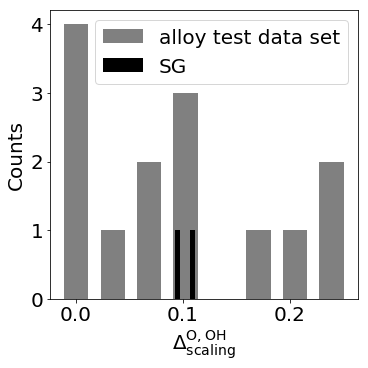

In [108]:
#read alloy data set and split into test and extrapolation
df_alloy['delta_O_OH']=np.abs(df_alloy['E_ads_OH_eV']-df_alloy['E_ads_OH_scaling_eV'])
df_alloy_test=df_alloy.dropna(subset=['E_ads_OH_scaling_eV'])
#apply SG rules to alloy test set
sg_alloy_test=df_alloy_test.query(sg_max_Q[3])

fig, (ax1) = plt.subplots(1,1, constrained_layout=True, figsize=(5,5))
delta_O_OH_heights, delta_O_OH_bins = np.histogram(df_alloy_test['delta_O_OH'].dropna(),bins=8)
delta_O_OH_width = (delta_O_OH_bins[1] - delta_O_OH_bins[0])/1.5
ax1.bar(delta_O_OH_bins[:-1], delta_O_OH_heights, width=delta_O_OH_width, color='grey', label='alloy test data set')

sg_alloy_scaling_heights, sg_alloy_scaling_bins = np.histogram(sg_alloy_test['delta_O_OH'],bins=3)
sg_alloy_scaling_width = (sg_alloy_scaling_bins[1] - sg_alloy_scaling_bins[0])/1.5
ax1.bar(sg_alloy_scaling_bins[:-1], sg_alloy_scaling_heights, width=sg_alloy_scaling_width, color='black', label='SG')

ax1.legend(loc='upper right')

ax1.set_ylabel('Counts')
ax1.set_xlabel('$\\Delta^{\mathrm{O,OH}}_{\mathrm{scaling}}$');

Finally, the SG rules are applied to the alloy exploitations set to select new promising alloys and surface sites.

In [102]:
#apply SG rules to alloy extrapolation set
df_alloy_exploitation=pd.concat([df_alloy,df_alloy_test]).drop_duplicates(keep=False)
df_alloy_exploitation.query(sg_rules_scaling).index.tolist()

['O_AgIr_sfcc1',
 'O_AgIr_sfcc2',
 'O_AgIr_shcp1',
 'O_AgIr_shcp2',
 'O_AgIr_tfcc1',
 'O_AgIr_tfcc2',
 'O_AgIr_thcp1',
 'O_AgIr_thcp2',
 'O_AgPt_sfcc1',
 'O_AgPt_sfcc2',
 'O_AgPt_tfcc1',
 'O_AgPt_tfcc2',
 'O_AgPt_thcp1',
 'O_AgPt_thcp2',
 'O_AuCu_sfcc1',
 'O_AuCu_shcp1',
 'O_AuCu_tfcc1',
 'O_AuCu_thcp1',
 'O_CuAg_sfcc1',
 'O_CuAg_sfcc2',
 'O_CuAg_shcp1',
 'O_CuAg_tfcc1',
 'O_CuAg_tfcc2',
 'O_CuAg_thcp1',
 'O_CuAg_thcp2',
 'O_CuPt_sfcc1',
 'O_CuPt_shcp1',
 'O_CuPt_tfcc1',
 'O_CuPt_tfcc2',
 'O_CuPt_thcp1',
 'O_CuPt_thcp2',
 'O_IrPt_sfcc1',
 'O_IrPt_sfcc2',
 'O_IrPt_tfcc1',
 'O_IrPt_tfcc2',
 'O_IrPt_thcp1',
 'O_IrPt_thcp2',
 'O_IrRu_tfcc1',
 'O_IrRu_thcp2',
 'O_NiAg_sfcc1',
 'O_NiAg_shcp1',
 'O_NiAg_tfcc1',
 'O_NiAg_thcp1',
 'O_NiAu_tfcc2',
 'O_NiAu_thcp2',
 'O_PdPt_sfcc1',
 'O_PdPt_tfcc1',
 'O_PdPt_thcp1',
 'O_PtRh_sfcc1',
 'O_PtRh_tfcc2',
 'O_PtRh_thcp2',
 'O_RhAg_sfcc1',
 'O_RhAg_shcp1',
 'O_RhAg_tfcc1',
 'O_RhAg_thcp1',
 'O_RhIr_sfcc2',
 'O_RhIr_tfcc1',
 'O_RhIr_tfcc2',
 'O_RhIr_thcp1

# Decision-tree-regression approach


It is instructive to compare to SGD to a popular AI algorithm, regression tree (RT), which also provides results in terms of rules, using selected descriptive parameters, describing subsets of data identified during the training. These subsets of data are called “leaves”, and RTs provide predictions for the values of the target according to the leaf to which a given data point belongs. However, the RT are trained so as to minimize the error average over the whole data set. Therefore, this approach does not necessarily allows to focus on the outstanding behavior of interest. 

We have therefore trained RT models using the same data sets of targets and descriptive parameters as for SGD. 
Prior to the training of the regression tree models, the appropriate maximum tree depth and minimum number of samples in a split (the hyperparameters) are determined using cross-validation. For this purpose, we use a leave-10%-out cross validation scheme. The selections of train and test subsets are performed randomly, using 500 independent selections. The root-mean-squared error (RMSE) averaged over all cross-validation iterations is used as metrics to choose the hyperparameters. Once the hyperparameters are identified, the regression tree is trained using the whole data set. 

In [1]:
iteration_list=list(range(1,100))
max_depth_list = list(range(1,11))
min_samples_split_list = list(range(2,10))

#decision-tree-regression approach for the target delta O
cv_errors=[]
min_error=[0,0,10]

for max_depth in max_depth_list:
    e1=[]
    for min_samples_split in min_samples_split_list:
        e2=[]
        for it in iteration_list:
            train_df, test_df = train_test_split(df_input, test_size=0.1, random_state=it)
            train_features_df = train_df.drop(columns=['delta_O'])
            test_features_df = test_df.drop(columns=['delta_O'])
            train_target_df = train_df['delta_O']
            test_target_df = test_df['delta_O']
            regressor = DecisionTreeRegressor(max_depth = max_depth, 
                                              min_samples_split = min_samples_split,
                                              random_state = 0)
            regressor.fit(train_features_df, train_target_df)
            predictions = regressor.predict(test_features_df)
            mse = mean_squared_error(list(test_target_df), predictions)
            rmse = np.sqrt(float(mse))
            e2.append(rmse)
        e1.append(statistics.mean(e2))
        if statistics.mean(e2) < min_error[2]:
            min_error=[min_samples_split,max_depth,statistics.mean(e2)]
    cv_errors.append(e1)

fig, (ax1) = plt.subplots(1,1, constrained_layout=True, figsize=(7,4))
sb.heatmap(np.array(cv_errors), 
            xticklabels=min_samples_split_list,
            yticklabels=max_depth_list,
            cmap='viridis_r',
            annot=True,
            fmt='.4g',
            linewidth=0.6,
            cbar_kws={'label': 'averaged test RMSE'})

ax1.set_xlabel("Minimum number of samples in a split") 
ax1.set_ylabel("Maximum tree depth") 
ax1.set_ylim([10,0])

print('The identified optimal hyperparameter are:',
      '\nminimum number of samples in a split =',"{:.0f}".format(min_error[0]),
      '\nmaximum tree depth =',"{:.0f}".format(min_error[1]))

NameError: name 'train_test_split' is not defined

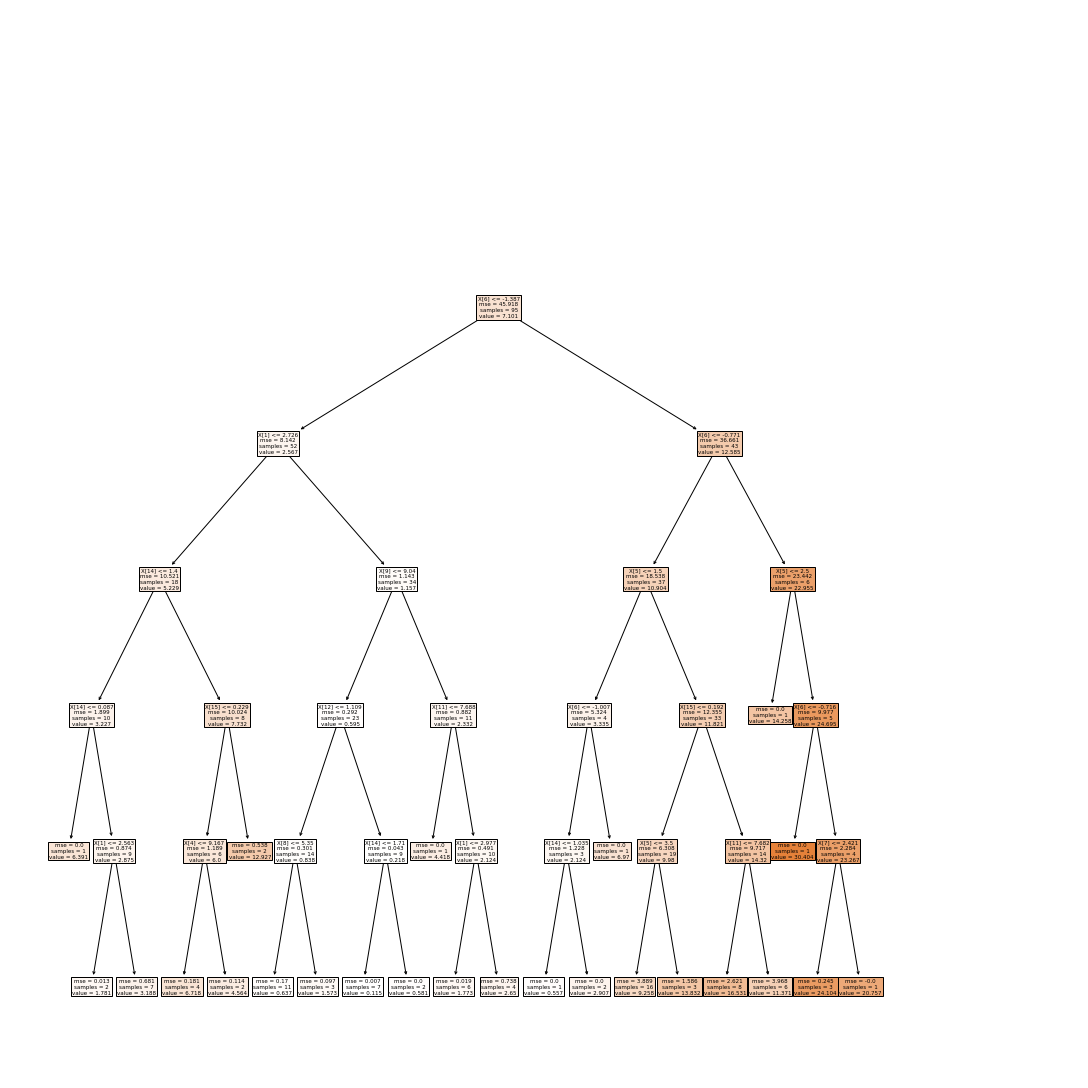

In [104]:
fig, (ax1) = plt.subplots(1,1, constrained_layout=True, figsize=(15,15))
min_samples_split= min_error[0]
max_depth = min_error[1]

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_split=min_samples_split, random_state=0)
regressor.fit(df_input.drop(columns=['delta_O']), df_input['delta_O'])
_=tree.plot_tree(regressor, filled=True)

The identified optimal hyperparameter are: 
minimum number of samples in a split = 4 
maximum tree depth= 10


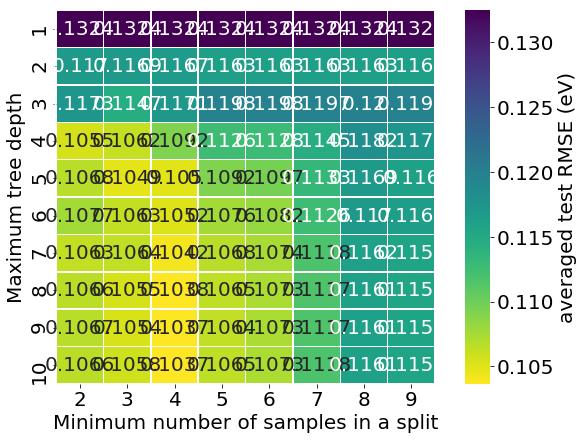

In [105]:
min_error_scaling=[0,0,10]
cv_errors=[]

#decision-tree-regression approach for the target delta O,OH
for max_depth in max_depth_list:
    e1=[]
    for min_samples_split in min_samples_split_list:
        e2=[]
        for it in iteration_list:
            train_df, test_df = train_test_split(df_input_scaling, test_size=0.1, random_state=it)
            train_features_df = train_df.drop(columns=['delta_O_OH'])
            test_features_df = test_df.drop(columns=['delta_O_OH'])
            train_target_df = train_df['delta_O_OH']
            test_target_df = test_df['delta_O_OH']
            regressor = DecisionTreeRegressor(max_depth = max_depth, 
                                              min_samples_split = min_samples_split,
                                              random_state = 0)
            regressor.fit(train_features_df, train_target_df)
            predictions = regressor.predict(test_features_df)
            mse = mean_squared_error(list(test_target_df), predictions)
            rmse = np.sqrt(float(mse))
            e2.append(rmse)
        e1.append(statistics.mean(e2))
        if statistics.mean(e2) < min_error_scaling[2]:
            min_error_scaling=[min_samples_split,max_depth,statistics.mean(e2)]
    cv_errors.append(e1)
    

fig, (ax1) = plt.subplots(1,1, constrained_layout=True, figsize=(7,4))
sb.heatmap(np.array(cv_errors), 
            xticklabels=min_samples_split_list,
            yticklabels=max_depth_list,
            cmap='viridis_r',
            annot=True,
            fmt='.4g',
            linewidth=0.6,
            cbar_kws={'label': 'averaged test RMSE (eV)'})

ax1.set_xlabel("Minimum number of samples in a split") 
ax1.set_ylabel("Maximum tree depth") 
ax1.set_ylim([10,0])

print('The identified optimal hyperparameter are:',
      '\nminimum number of samples in a split =',"{:.0f}".format(min_error_scaling[0]),
      '\nmaximum tree depth =',"{:.0f}".format(min_error_scaling[1]))

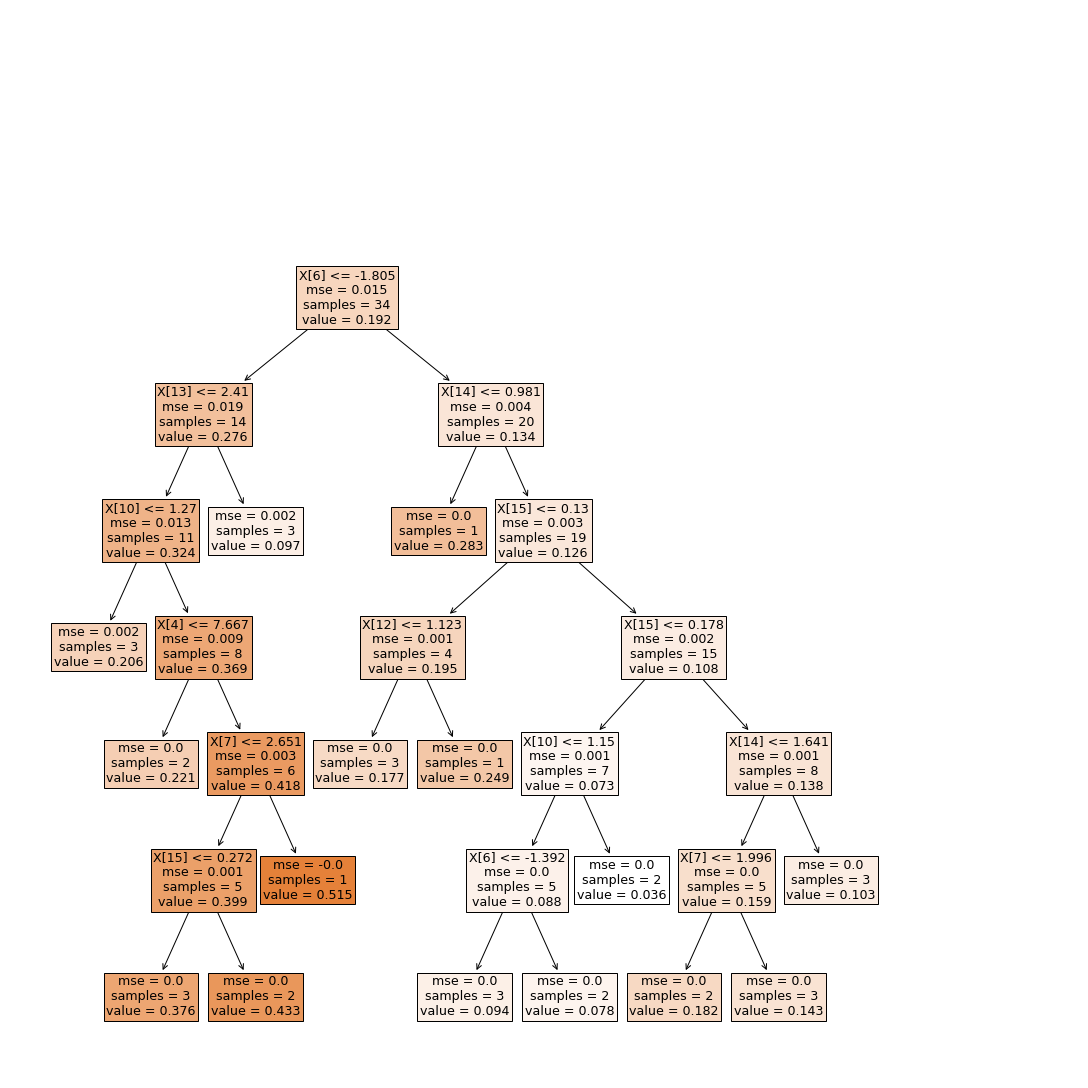

In [106]:
fig, (ax1) = plt.subplots(1,1, constrained_layout=True, figsize=(15,15))
min_samples_split= min_error_scaling[0]
max_depth = min_error_scaling[1]

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_split=min_samples_split, random_state=0)
regressor.fit(df_input_scaling.drop(columns=['delta_O_OH']), df_input_scaling['delta_O_OH'])
_=tree.plot_tree(regressor, filled=True)